## Complete EDA Analysis 

## About Dataset

### Description
The dataset was downloaded from Kaggle, from the following [link](#).

### Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. 

On digging deeper, I found that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using jQuery, making scraping more challenging.

### Content
Each app (row) has values for category, rating, size, and more.

### Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

### Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


# Importiong libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading Exloration and cleaning

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Important things to know

In [5]:
# set options to be maximum for  all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')


In [6]:
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.shape

(10841, 13)

In [8]:
print(f"the name of the columns in the dataset are {df.columns}")

the name of the columns in the dataset are Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [9]:
print(f'Number of rows {df.shape[0]}, and columns {df.shape[1]}')

Number of rows 10841, and columns 13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# how to make a review a numeric column


In [13]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
df['Reviews'].isnull().sum() 

np.int64(0)

# how to make a size to  a numeric column

In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

##  Observation 
1.'Varies with device'
2.'83M'
3.'44k'

In [16]:
df['Size'].isnull().sum()   

np.int64(0)

-No missing value in size we are good to go


verifiy the number of values and three diff kind of values

In [17]:
# Find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()


np.int64(8829)

In [18]:
# Find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()


np.int64(316)

In [19]:
# Find the values having varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()


np.int64(1695)

In [20]:
len(df['Size'])

10841

In [21]:
# convert the whole size column to bytes
# let's define a function that will convert the size to bytes
def covert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k',''))*1024
        elif 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'Varies with device' in size:  # we will convert this to NaN
            return np.nan
    return size
    

In [22]:
df['Size'] = df['Size'].apply(covert_size)

In [23]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [24]:
# rename the column name
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [25]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
# Convert the column to numeric, setting errors='coerce' to replace non-numeric values with NaN
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

# Now, convert bytes to megabytes
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x / (1024 * 1024) if pd.notna(x) else x)


In [27]:
# Now, convert bytes to kb
df['Size_in_kb'] = df['Size_in_bytes'].apply(lambda x: x / (1024) if pd.notna(x) else x)


In [28]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


## let take a look at the data types of the columns install

In [29]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [30]:
df['Installs'].isnull().sum()

np.int64(0)

In [31]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

 Install Observation
1. remove + sign 
2. remove ,
3. convert the integer  into column 

In [32]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','') if '+' in x else x)      

In [33]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','') if ',' in x else x)      

In [34]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [35]:
# df['Installs']=df['Installs'].apply(lambda x: int(x))   
# Remove non-numeric characters and convert to integer
df['Installs'] = df['Installs'].replace({'[,+]': '', 'Free': '0'}, regex=True).astype(int)


In [36]:
df.describe()

,Rating,Size_in_bytes,Installs,Size_in_Mb,Size_in_kb
count,9367.000000,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546291e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502557e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [37]:
df['Installs'].value_counts()   

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

## Price column

In [38]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200

In [39]:
df['Price'].isnull().sum()  

np.int64(0)

In [40]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [41]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$','') if '$' in x else x) 

In [42]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.

In [43]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(0)

In [44]:
# the code in the coloumn count the num of values in the price column that contains the 0 but not contain the $ sign
df['Price'].loc[(df['Price'].str.contains('0'))&(~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10223)

In [45]:
df['Price']=df['Price'].apply(lambda x: x.replace('Everyone','0') if 'Everyone' in x else x)

In [46]:
df['Price']=df['Price'].apply(lambda x: x.replace('$','') if ',' in str(x) else x)  

In [47]:
df['Price'].value_counts()

Price
0         10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [48]:
df['Price']=df['Price'].apply(lambda x: float(x))                                                   

In [49]:
df.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,9.145000e+03,1.084100e+04,10841.000000,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546291e+07,1.027273,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502557e+07,15.948971,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [50]:
# using f string to print min and max  and avg price of column  
print(f"Min price: {df['Price'].min()}")
print(f"Max price: {df['Price'].max()}")    
print(f"Avg price: {df['Price'].mean()}")                                                                                   

Min price: 0.0
Max price: 400.0
Avg price: 1.0272733142699015


# Missing values

In [51]:
# find missing values in the column             
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1696
Size_in_Mb        1696
Size_in_kb        1696
Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [52]:
# function to find the missing values % in the data 
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)


Size_in_bytes     15.64
Size_in_Mb        15.64
Size_in_kb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.03
Type               0.01
Content Rating     0.01
App                0.00
Category           0.00
Reviews            0.00
Installs           0.00
Price              0.00
Genres             0.00
Last Updated       0.00
dtype: float64

In [53]:
# find total num of missing values in the data
df.isnull().sum().sum()

np.int64(6575)

<Axes: >

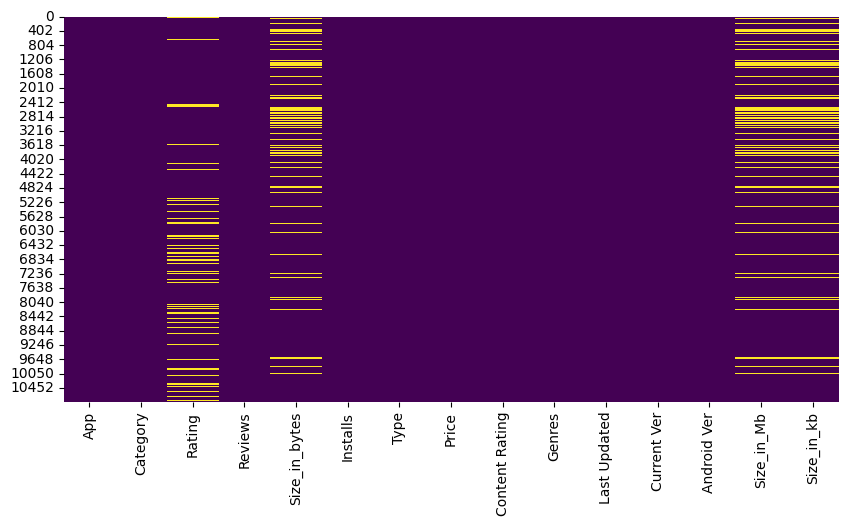

In [54]:
# plote missing values in the data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Missing values % by column')

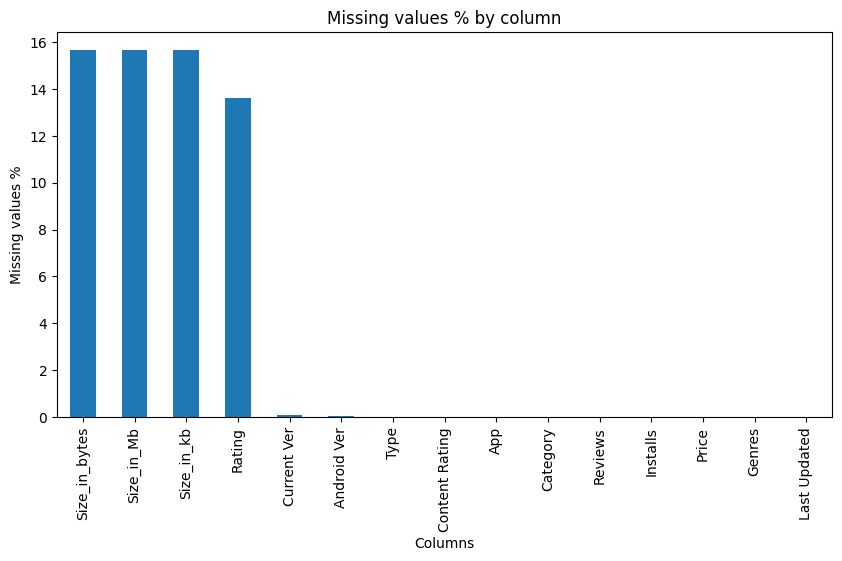

In [55]:
# make figur size
plt.figure(figsize=(10,5))
# plot the missing values in the data  
missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)*100 
missing_percentage.plot(kind='bar')                                 
# add the label
plt.xlabel('Columns')
plt.ylabel('Missing values %')  
plt.title('Missing values % by column')                  


<Axes: >

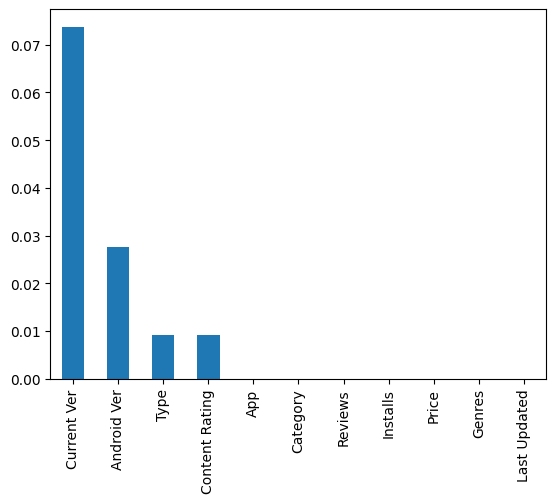

In [56]:
missing_percentage[missing_percentage < 1].plot(kind='bar') 

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

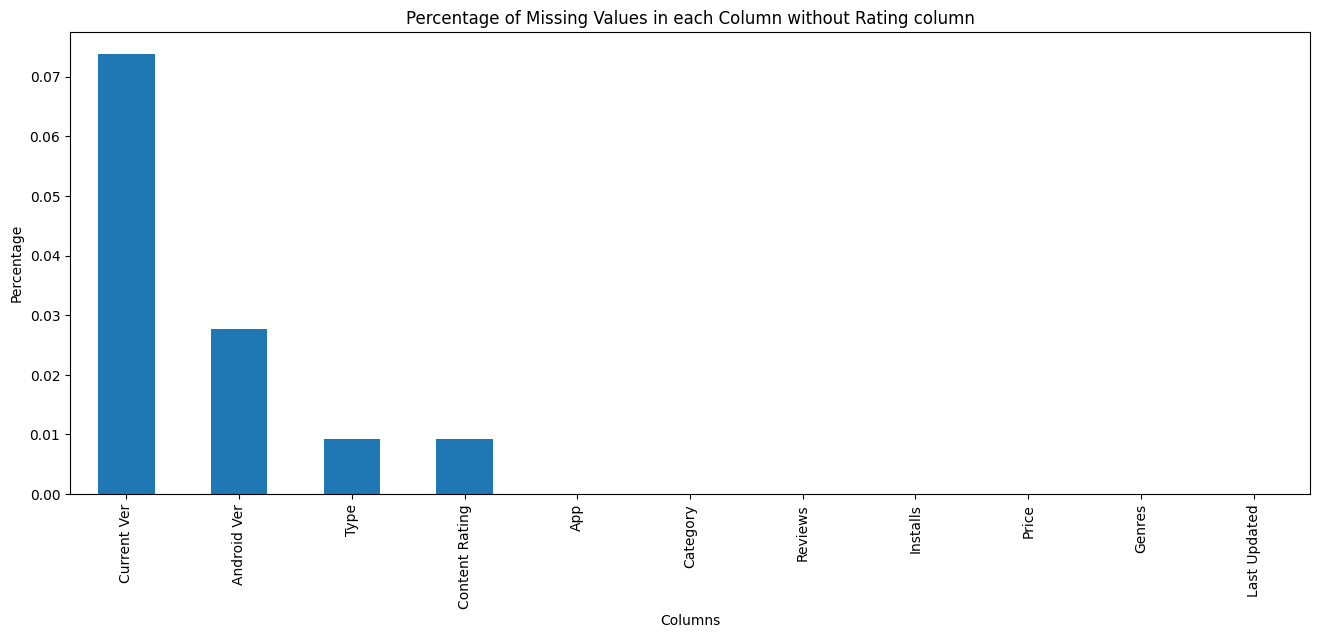

In [57]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

In [60]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1696
Size_in_Mb        1696
Size_in_kb        1696
Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [63]:
(df.isnull().sum() / len(df) *100).sort_values(ascending=False)

Size_in_bytes     15.644313
Size_in_Mb        15.644313
Size_in_kb        15.644313
Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Type               0.009224
Content Rating     0.009224
App                0.000000
Category           0.000000
Reviews            0.000000
Installs           0.000000
Price              0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

### - Observations:
- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.

- ### Dealing with the missing values
- We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test

In [64]:
df.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb,Size_in_kb
count,9367.000000,9.145000e+03,1.084100e+04,10841.000000,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546291e+07,1.027273,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502557e+07,15.948971,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,400.000000,100.000000,102400.000000


In [65]:
df.describe(include='all')


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
count,10841,10841,9367.000000,10841,9.145000e+03,1.084100e+04,10840,10841.000000,10840,10841,10841,10833,10838,9145.000000,9145.000000
unique,9660,34,NaN,6002,NaN,NaN,3,NaN,6,120,1378,2832,33,NaN,NaN
top,ROBLOX,FAMILY,NaN,0,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,NaN,NaN
freq,9,1972,NaN,596,NaN,NaN,10039,NaN,8714,842,326,1459,2451,NaN,NaN
mean,NaN,NaN,4.193338,NaN,2.256133e+07,1.546291e+07,NaN,1.027273,NaN,NaN,NaN,NaN,NaN,21.516165,22032.553406
std,NaN,NaN,0.537431,NaN,2.368637e+07,8.502557e+07,NaN,15.948971,NaN,NaN,NaN,NaN,NaN,22.589084,23131.222364
min,NaN,NaN,1.000000,NaN,8.704000e+03,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.008301,8.500000
25%,NaN,NaN,4.000000,NaN,5.138022e+06,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.900000,5017.600000
50%,NaN,NaN,4.300000,NaN,1.363149e+07,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,13.000000,13312.000000
75%,NaN,NaN,4.500000,NaN,3.145728e+07,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,30.000000,30720.000000


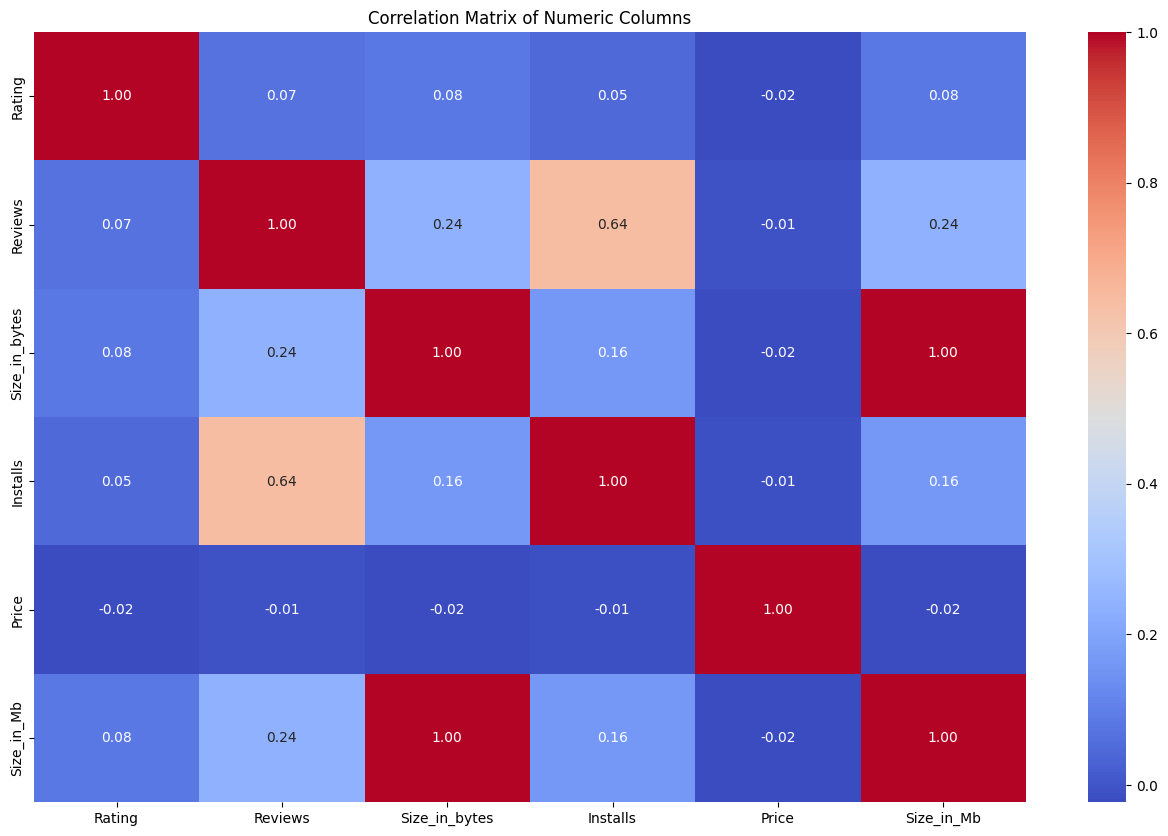

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert problematic columns to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Size_in_Mb'] = pd.to_numeric(df['Size_in_Mb'], errors='coerce')

# Make figure size
plt.figure(figsize=(16, 10))

# List of numeric columns
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix of Numeric Columns")
plt.show()


In [69]:


# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matri

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068141,0.083737,0.048652,-0.021176,0.083737
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667,0.238214
Size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000
Installs,0.048652,0.643122,0.164787,1.000000,-0.011688,0.164787
Price,-0.021176,-0.009667,-0.023007,-0.011688,1.000000,-0.023007
Size_in_Mb,0.083737,0.238214,1.000000,0.164787,-0.023007,1.000000


In [70]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262



### - Observations
 - Lighter color shows the high correlation and darker color shows the low correlation
 - We can see that the Reviews column has a high correlation with the  - Installs column, which is 0.64 according to corr(). Which is quite good.
 - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
 - If we have an ap with 2 installs and we imputer the reviews with 1000 or via average reviews then it will be wrong.
 - Installs is slightly correlated with Size_in_Mb or Size_in_bytes , which is 0.16, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.

- Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [71]:

# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [72]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [73]:

# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


In [74]:
#  let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1694
Size_in_Mb        1694
Size_in_kb        1694
Rating            1469
App                  0
Category             0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


  - ### Observations
- Only Rating and Size_in_bytes or Size_in_Mb columns are left with missing values.
- We know that we have to be carefull while deadling with Rating column, as it is directly linked with the Installs column.
- In Size columns we already know about Varies with device values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.

In [75]:

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_kb'],
      dtype='object')

In [78]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Size_in_kb'],
      dtype='object')


In [79]:

# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs,,,,,,,,
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,5.000000,0.000000,5.0,5.00,5.0,5.000,5.0
5,9.0,4.611111,1.166667,1.5,5.00,5.0,5.000,5.0
10,69.0,4.624638,0.821119,1.0,4.80,5.0,5.000,5.0
50,56.0,4.419643,1.046799,1.0,4.35,5.0,5.000,5.0
100,309.0,4.363430,0.847641,1.0,4.00,4.7,5.000,5.0
500,201.0,4.176617,0.801873,1.0,3.90,4.4,4.700,5.0
1000,712.0,4.066292,0.784476,1.0,3.70,4.3,4.600,5.0
5000,431.0,4.026450,0.636302,1.4,3.70,4.2,4.500,5.0


In [80]:

df['Rating'].isnull().sum()

np.int64(1469)

In [82]:
# in which Install_category the Rating has NaN values
df['Installs'].loc[df['Rating'].isnull()].value_counts()

Installs
100        409
10         316
1000       193
50         149
500        129
5           73
1           64
5000        45
10000       43
100000      19
0           14
50000       12
1000000      2
500000       1
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

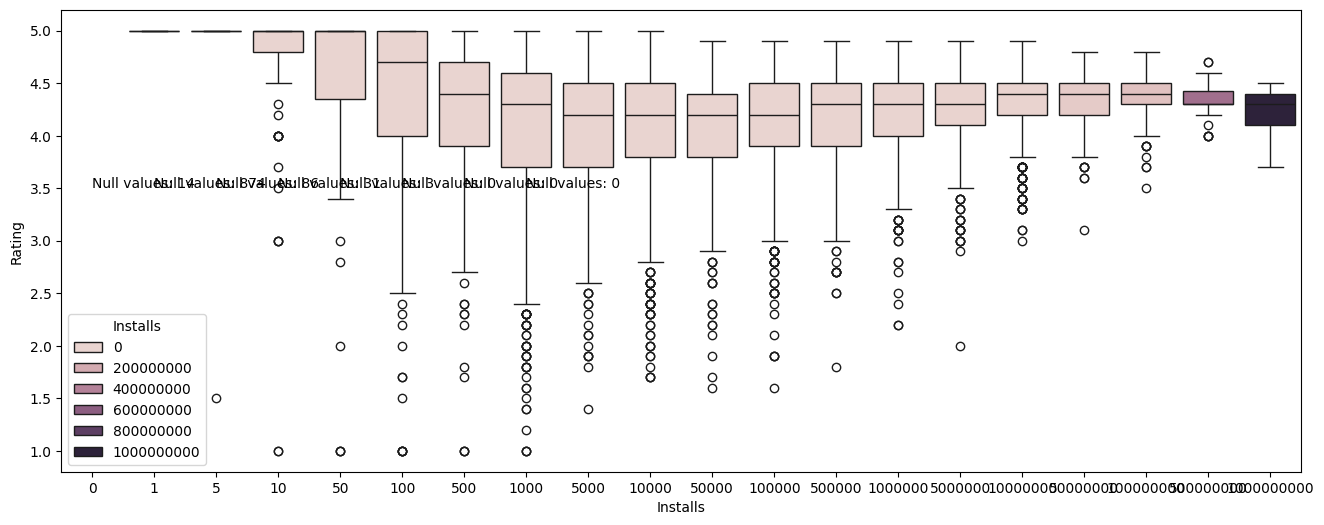

In [83]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs', y='Rating', hue='Installs', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [85]:

# in which Install_category the Rating has NaN values
df['Installs'].loc[df['Reviews'].isnull()].value_counts()

Series([], Name: count, dtype: int64)

<Axes: xlabel='Installs', ylabel='Reviews'>

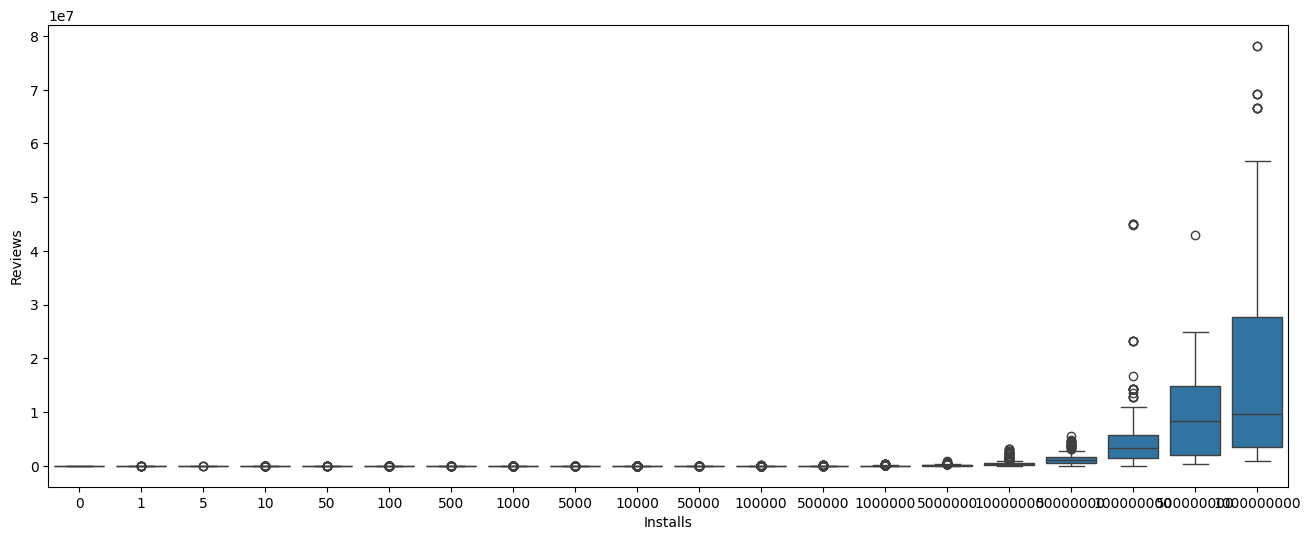

In [86]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs', y= 'Reviews', data=df) # plot the boxplot

<Axes: xlabel='Installs', ylabel='Reviews'>

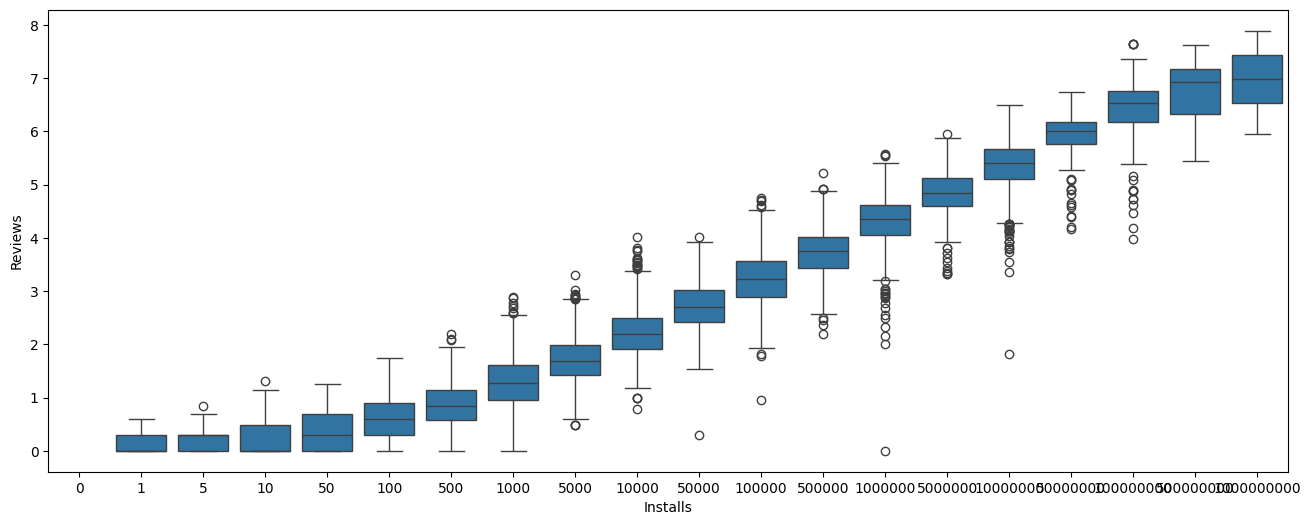

In [88]:
#  let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs', y= np.log10(df['Reviews']), data=df) # plot t

<Axes: xlabel='Rating', ylabel='Reviews'>

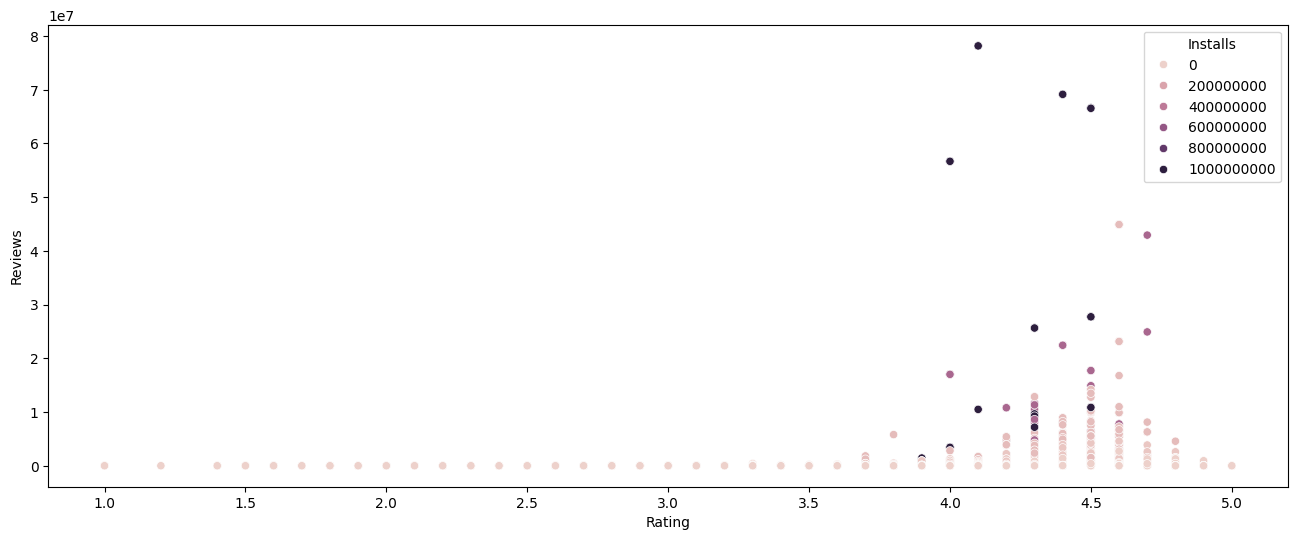

In [89]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs', data=df) # plo

<Axes: xlabel='Reviews', ylabel='Installs'>

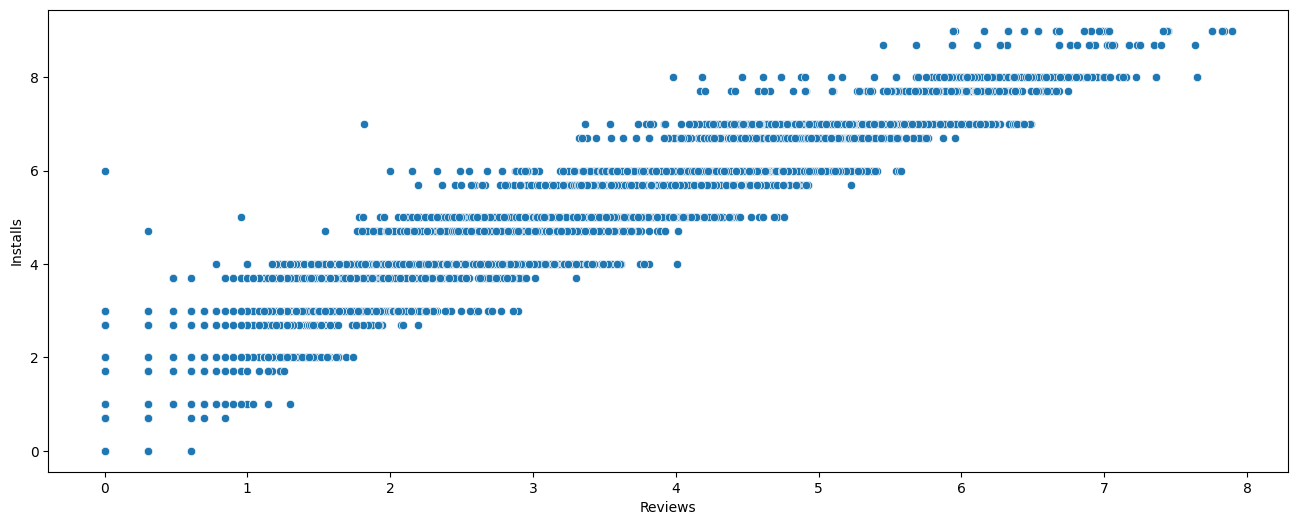

In [90]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot


- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

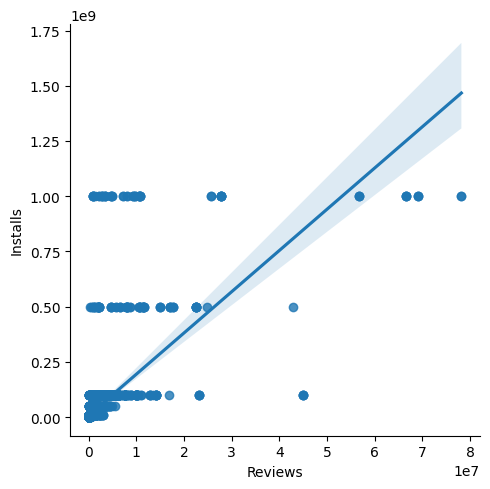

In [91]:
# plot reviews plot and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

### Observation
- We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

##  Duplicates
- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [92]:
# find the duplicate if any  
df.duplicated().sum()

np.int64(483)


- This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [93]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)


- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?
let's check for number of duplicates in each column using a for loop and printing the output

In [94]:

# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10789
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Size_in_kb column are: 10373


In [95]:

# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [96]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,3891.2
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.800000,3891.2
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,26624.0
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.000000,26624.0
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,3891.2
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.800000,3891.2
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,15360.0
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,15.000000,15360.0
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,25600.0
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,25.000000,25600.0


In [97]:

# remove the duplicates
df.drop_duplicates(inplace=True)

In [98]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


3. Insights from Data


### Which category has the highest number of apps?

In [99]:

# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highes

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

In [100]:

# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### Which app has higher num of reviews

In [104]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head

<bound method NDFrame.head of Category
GAME                   1.415537e+09
COMMUNICATION          6.012736e+08
SOCIAL                 5.335768e+08
FAMILY                 3.967717e+08
TOOLS                  2.731810e+08
PHOTOGRAPHY            2.042974e+08
VIDEO_PLAYERS          1.103802e+08
PRODUCTIVITY           1.025545e+08
SHOPPING               9.493116e+07
PERSONALIZATION        7.519274e+07
SPORTS                 6.532271e+07
TRAVEL_AND_LOCAL       5.556516e+07
ENTERTAINMENT          4.757072e+07
NEWS_AND_MAGAZINES     3.824587e+07
HEALTH_AND_FITNESS     3.084519e+07
MAPS_AND_NAVIGATION    3.065925e+07
EDUCATION              2.316550e+07
BOOKS_AND_REFERENCE    2.187322e+07
FINANCE                1.699989e+07
WEATHER                1.460474e+07
LIFESTYLE              1.282058e+07
BUSINESS               1.235817e+07
FOOD_AND_DRINK         7.671576e+06
DATING                 5.545397e+06
COMICS                 3.383276e+06
HOUSE_AND_HOME         2.794772e+06
ART_AND_DESIGN         1.

 ### Which category has the highest rating?

In [105]:
df.groupby('Category')['Rating'].sum().sort_values(ascending=False).head

<bound method NDFrame.head of Category
FAMILY                 7196.4
GAME                   4598.1
TOOLS                  2966.6
PRODUCTIVITY           1403.4
PERSONALIZATION        1334.6
FINANCE                1308.4
COMMUNICATION          1274.5
PHOTOGRAPHY            1271.6
MEDICAL                1263.1
LIFESTYLE              1249.3
SPORTS                 1208.4
HEALTH_AND_FITNESS     1116.5
BUSINESS               1107.7
SOCIAL                 1038.2
NEWS_AND_MAGAZINES      883.5
SHOPPING                858.8
TRAVEL_AND_LOCAL        839.3
BOOKS_AND_REFERENCE     769.5
VIDEO_PLAYERS           650.2
DATING                  631.5
EDUCATION               564.5
MAPS_AND_NAVIGATION     502.4
ENTERTAINMENT           459.1
FOOD_AND_DRINK          441.4
WEATHER                 318.3
AUTO_AND_VEHICLES       305.9
HOUSE_AND_HOME          283.2
LIBRARIES_AND_DEMO      267.5
ART_AND_DESIGN          267.0
COMICS                  241.0
PARENTING               215.0
EVENTS                  199.6
B

<Axes: xlabel='Rating', ylabel='Density'>

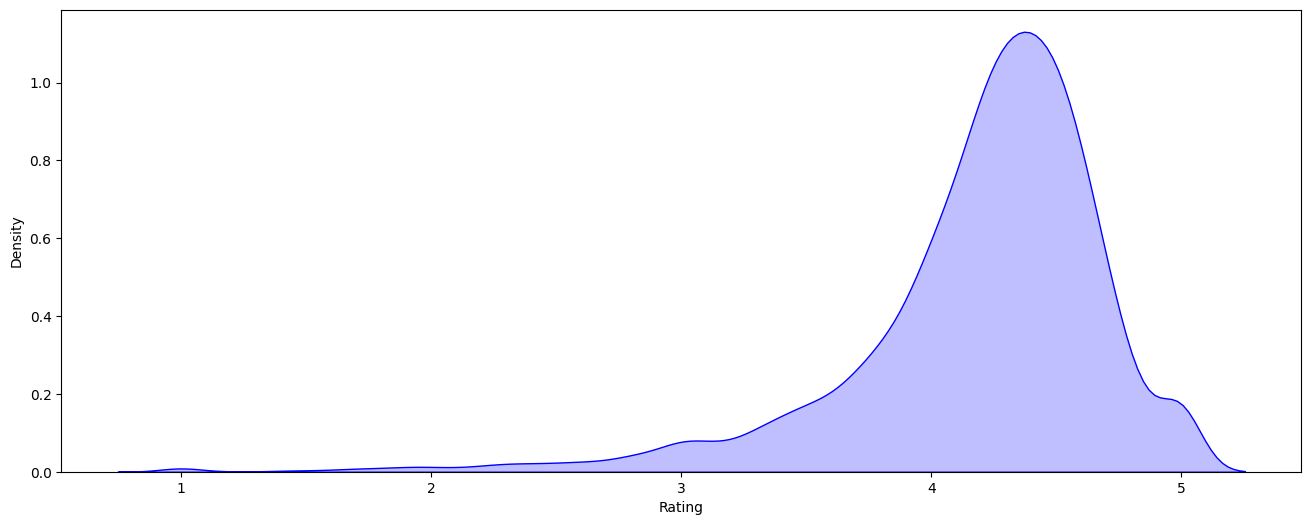

In [106]:

# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

In [107]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


<Axes: xlabel='Installs', ylabel='Price'>

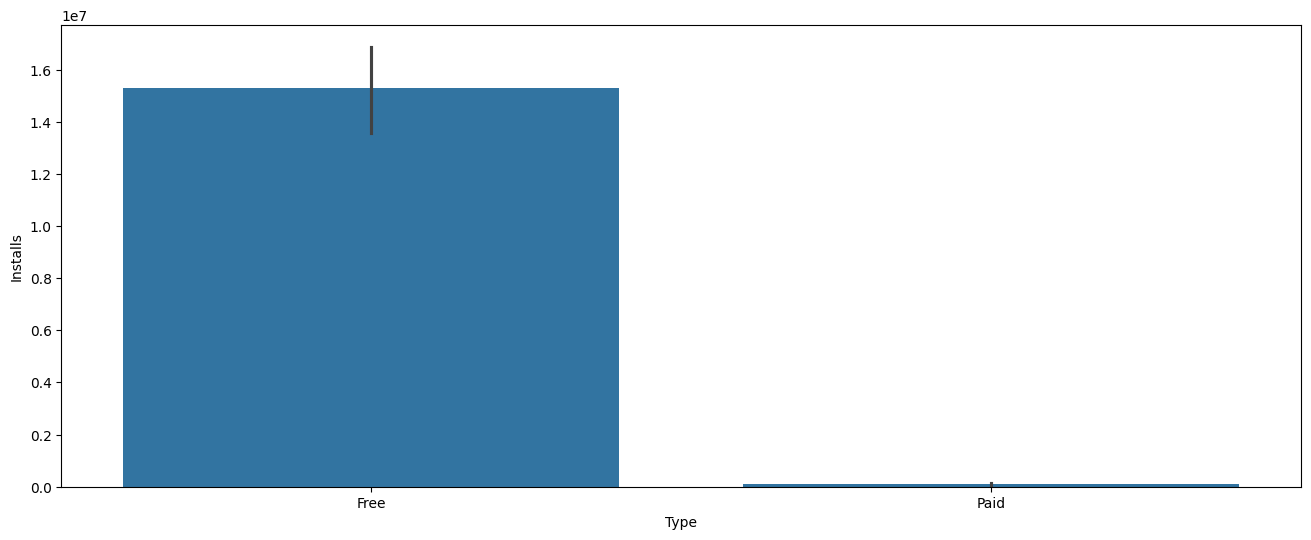

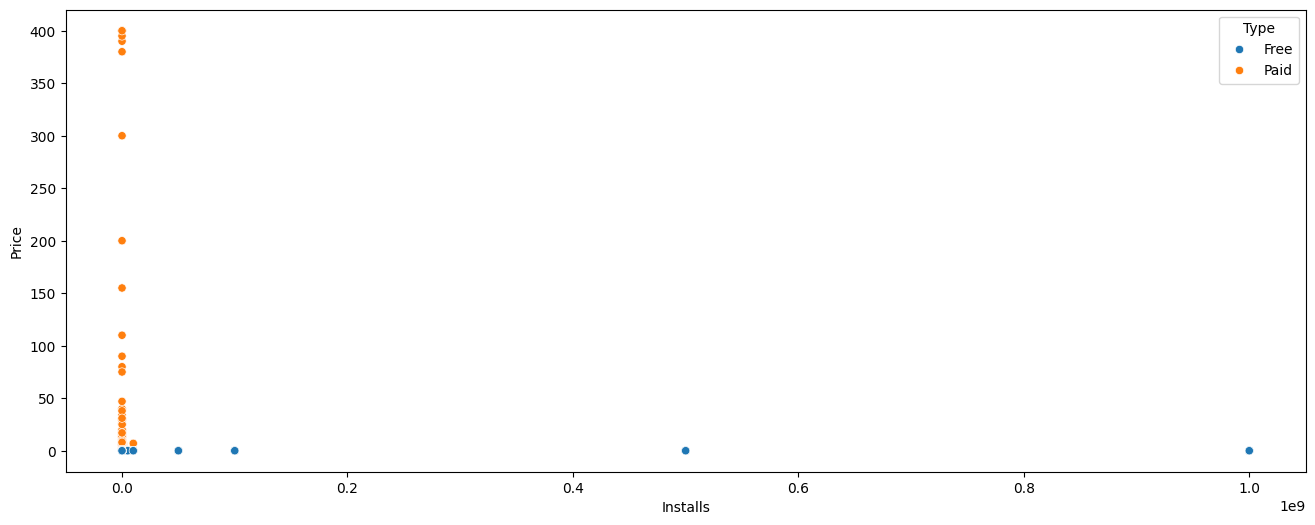

In [108]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

<Axes: xlabel='Installs', ylabel='Size_in_Mb'>

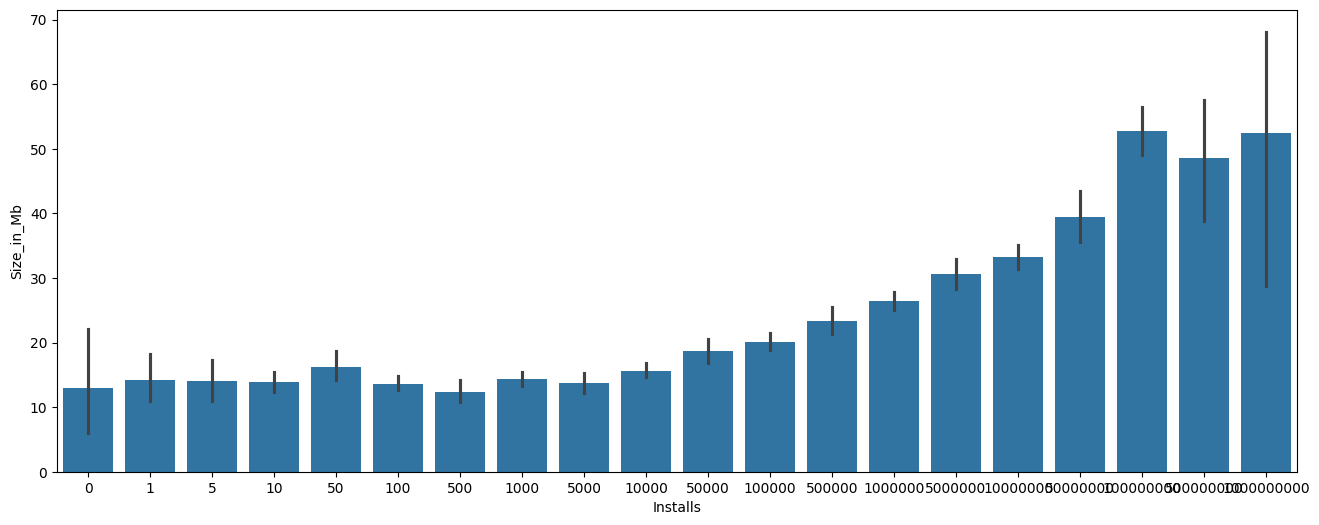

In [110]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs', y='Size_in_Mb', data=df) # plot the bar plot

In [111]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

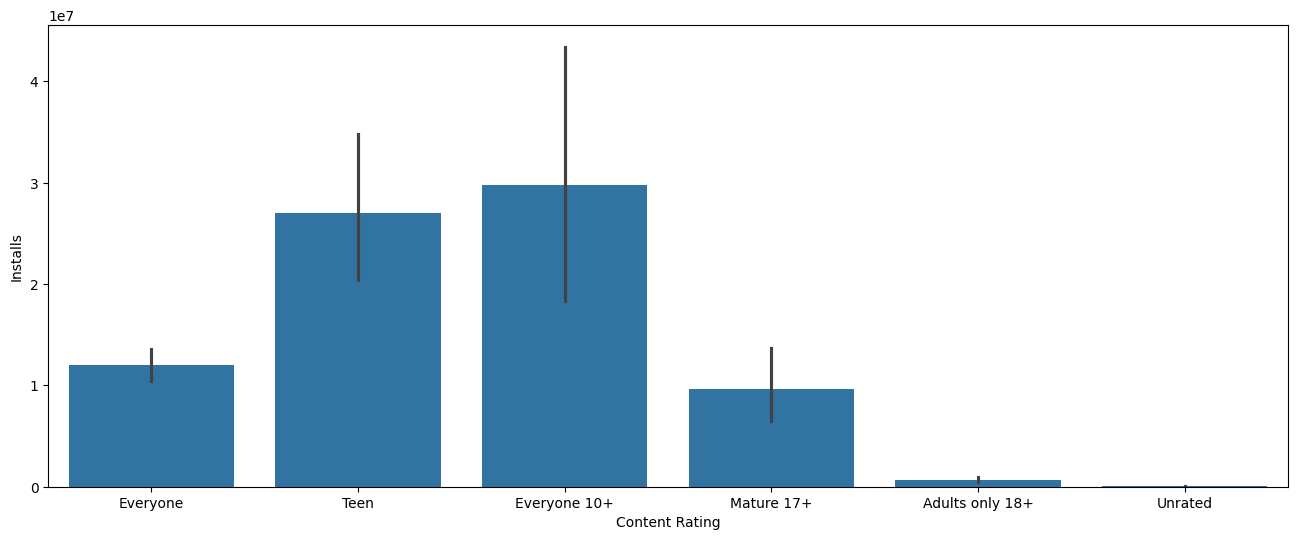

In [112]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [113]:

# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

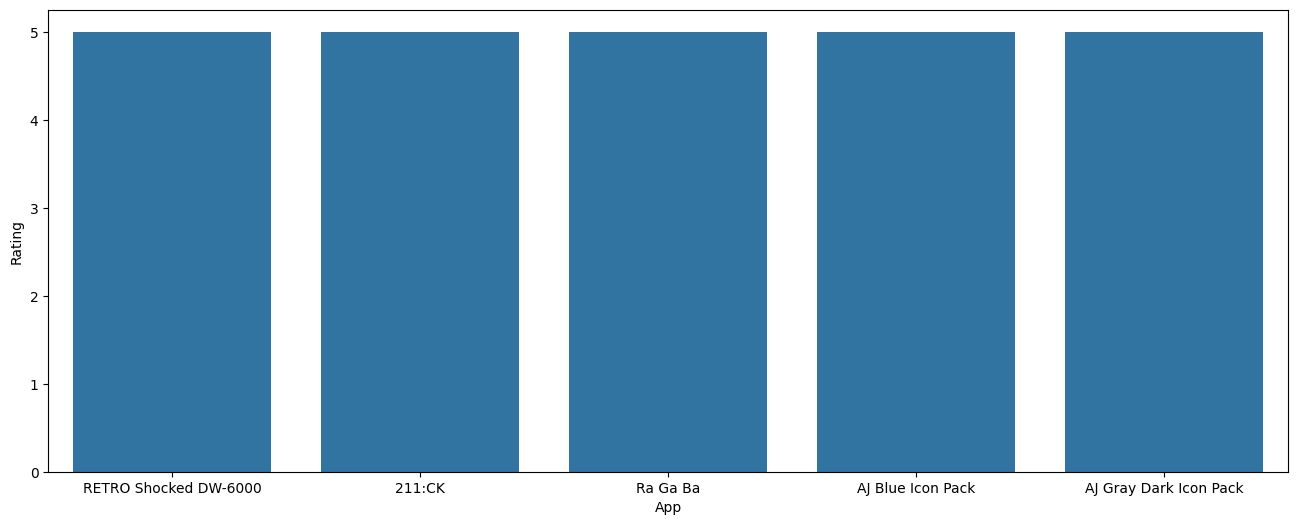

In [114]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [115]:

df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13.0,512000.0,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,0.488281,500.0
7466,211:CK,GAME,5.0,8.0,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,38912.0
5917,Ra Ga Ba,GAME,5.0,2.0,20971520.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,20.000000,20480.0
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4.0,32505856.0,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,31744.0
5260,AJ Gray Dark Icon Pack,PERSONALIZATION,5.0,2.0,36700160.0,10,Paid,0.99,Everyone,Personalization,"April 29, 2018",1.1,4.1 and up,35.000000,35840.0


<Axes: xlabel='App', ylabel='Rating'>

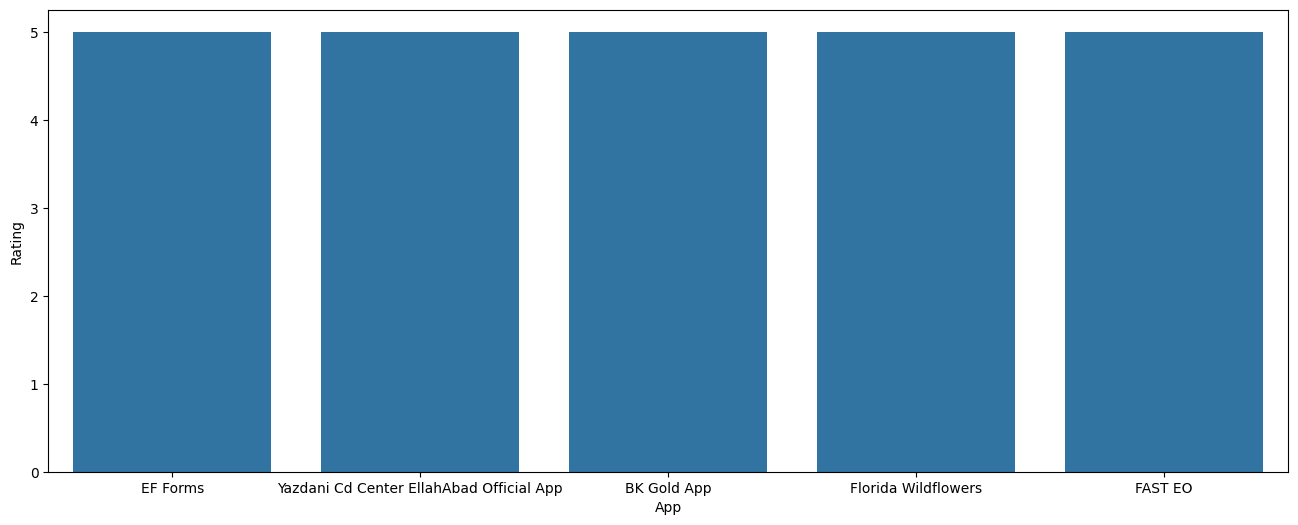

In [116]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [117]:

df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
9290,EF Forms,BUSINESS,5.0,2.0,24117248.0,50,Free,0.0,Everyone,Business,"July 24, 2018",1.29,4.4 and up,23.0,23552.0
7170,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8.0,3984588.8,500,Free,0.0,Everyone,Entertainment,"January 12, 2018",2.0,4.0 and up,3.8,3891.2
6398,BK Gold App,FINANCE,5.0,4.0,11534336.0,50,Free,0.0,Everyone,Finance,"May 25, 2018",1.0.0,4.4 and up,11.0,11264.0
10629,Florida Wildflowers,FAMILY,5.0,5.0,72351744.0,1000,Free,0.0,Everyone,Education,"July 10, 2017",1.5,4.1 and up,69.0,70656.0
9659,FAST EO,EVENTS,5.0,1.0,NaN,10,Free,0.0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up,NaN,NaN


<Axes: xlabel='App', ylabel='Reviews'>

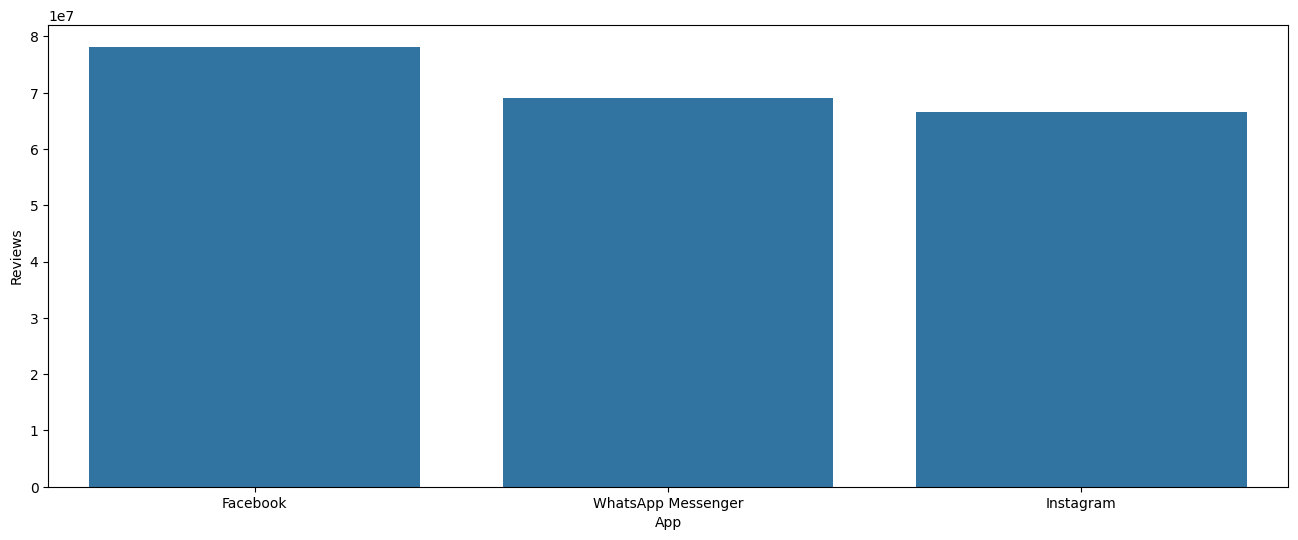

In [118]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [119]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,NaN
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,NaN
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,NaN


<Axes: xlabel='App', ylabel='Reviews'>

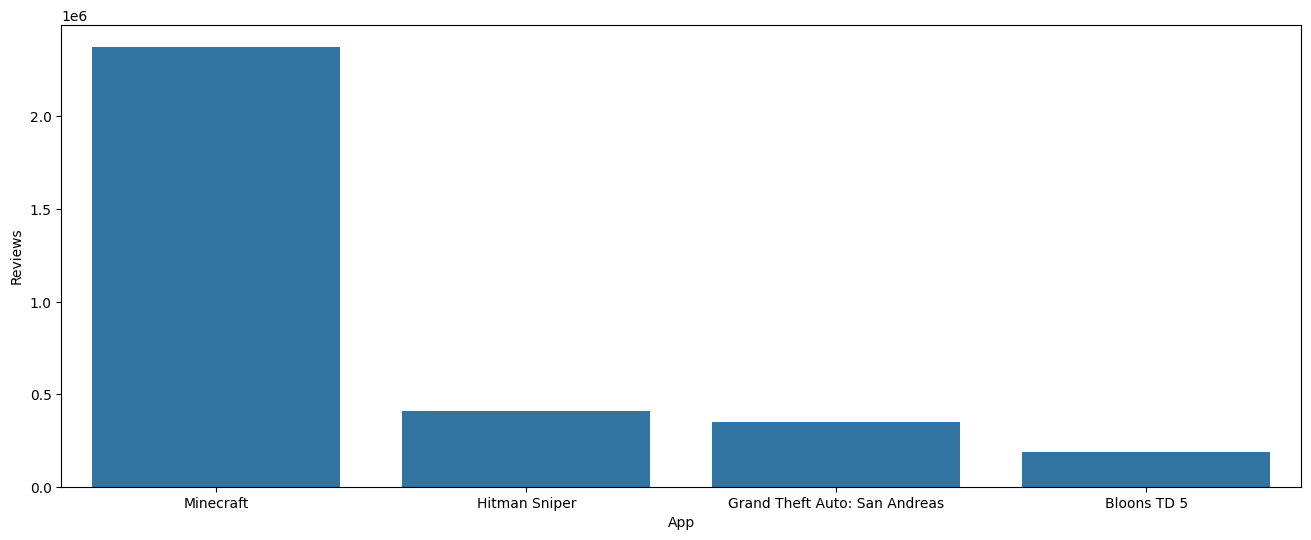

In [120]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

## Good Luck! 